In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
# and will use scikit-learn & scipy

In [2]:
water = pd.read_csv('water_potability.csv')
water = water.sample(frac=1).reset_index(drop=True)
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,5.744068,173.850882,28391.998185,7.017330,355.461589,336.061803,16.895180,65.447362,3.171655,0
1,5.019985,156.970822,19272.704481,6.184710,331.559845,341.357160,16.196573,75.302598,4.089485,0
2,8.528292,227.686207,27352.343415,7.676323,349.995746,388.137754,12.611736,80.186071,4.596924,0
3,1.431782,228.130383,12937.246891,6.214773,319.734136,495.379883,12.033344,61.141119,4.948443,0
4,NaN,166.913991,24037.510490,7.136713,349.885276,411.478461,9.456473,94.901122,3.743704,1


Handling missing data by simply dropping the samples with any NaN value

In [3]:
water.dropna(axis=0, inplace=True)

Now I will reserve some part of the data as test set to use it in final evaluation 

In [4]:
from sklearn.model_selection import train_test_split
water_data = water.drop('Potability', axis=1)
water_label = water.Potability
X_train, X_test, y_train, y_test = train_test_split(water_data, water_label, test_size=0.33, stratify=water_label, random_state=0)
data = pd.concat([X_train, y_train], axis=1)
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1631,7.703357,211.344687,12861.946542,9.245306,347.630834,598.662877,10.542342,91.118698,4.732125,0
1609,5.729303,162.857585,34573.678786,5.654856,415.287072,297.631365,13.990842,76.744677,3.556395,1
2824,9.130769,266.744959,9929.194810,6.011964,352.153214,542.806782,10.974207,65.782453,4.771444,1
685,8.490572,204.123648,22989.796390,8.270793,358.847115,435.000898,17.084246,62.421637,3.875557,0
2692,5.331940,194.874065,16658.876503,7.993830,316.675162,335.120398,10.180514,59.572714,4.434820,0
...,...,...,...,...,...,...,...,...,...,...
2752,6.448931,240.244771,13979.165723,9.077985,314.590477,473.751302,17.416903,84.024786,3.622196,1
3115,5.967274,187.085084,30846.585474,7.281106,339.063715,323.962695,12.651854,72.273590,3.914544,0
2068,7.591346,199.255322,25383.765183,7.924616,318.610478,416.445617,20.118827,48.271210,4.515150,1
537,5.057736,137.689344,11229.137777,6.411410,481.030642,580.095225,15.390304,43.882514,3.163936,1


<h2>Exploratory Data Analysis</h2>

In [5]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000
mean,7.128429,196.547606,22003.396364,7.154576,334.527595,424.664406,14.365734,66.427064,3.968326,0.403118
std,1.575365,32.276072,8608.815611,1.577557,41.632853,80.671811,3.314669,15.748282,0.780680,0.490706
min,0.989912,73.492234,1372.091043,2.456014,129.000000,210.319182,4.466772,8.577013,1.492207,0.000000
25%,6.114756,177.243077,15665.106976,6.125928,309.532873,365.012636,12.170193,56.969479,3.442485,0.000000
50%,7.061831,197.374482,21148.241905,7.146140,333.812264,419.304980,14.326638,66.231436,3.962525,0.000000
75%,8.107168,216.748665,27304.231215,8.133701,360.560273,480.863304,16.720675,77.349886,4.492003,1.000000
max,14.000000,317.338124,56488.672413,13.043806,481.030642,753.342620,24.755392,116.161622,6.494749,1.000000


Features are on very different scales

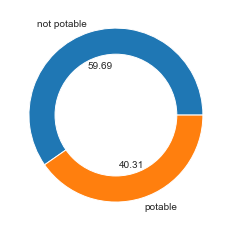

In [6]:
plt.pie(data.Potability.value_counts(), labels=['not potable','potable'], autopct='%.2f')
white_circle = plt.Circle( (0,0), 0.7, color='white')
plt.gcf().gca().add_artist(white_circle)

Class distribution is skewed

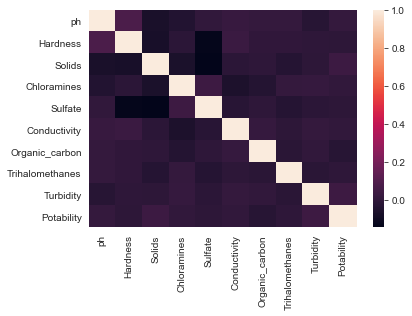

In [7]:
corr = data.corr()
sns.heatmap(corr)

Features have bad linear relationships, meaning that linear models won't help much

Now we will see how features distribute to per class.

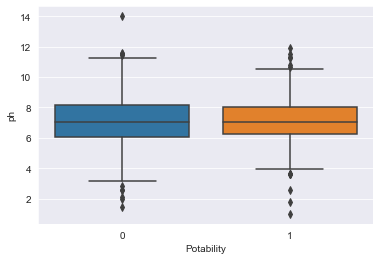

In [8]:
sns.boxplot(data=data, x='Potability', y='ph')

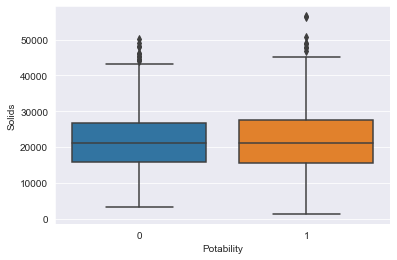

In [9]:
sns.boxplot(data=data, x='Potability', y='Solids')

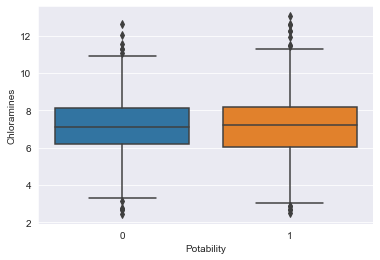

In [10]:
sns.boxplot(data=data, x='Potability', y='Chloramines')

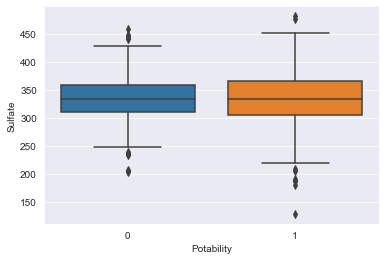

In [11]:
sns.boxplot(data=data, x='Potability', y='Sulfate')

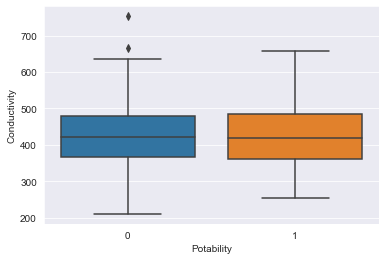

In [12]:
sns.boxplot(data=data, x='Potability', y='Conductivity')

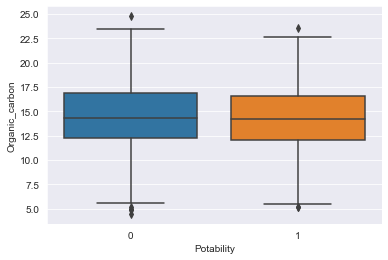

In [13]:
sns.boxplot(data=data, x='Potability', y='Organic_carbon')

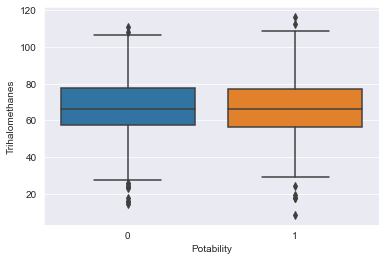

In [14]:
sns.boxplot(data=data, x='Potability', y='Trihalomethanes')

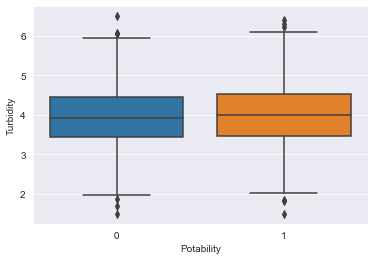

In [15]:
sns.boxplot(data=data, x='Potability', y='Turbidity')

In [16]:
#sns.pairplot(data = data, hue='Potability')

Differences in plots at the diagonal indicate these features' help to distinguish between classes

Before building powerful models, let's see an example to linear models that can't learn this data

In [20]:
X_train = data.drop('Potability', axis=1).to_numpy()
y_train = data.Potability.to_numpy()

In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, f1_score
cr_logreg = classification_report(y_test, pred_logreg, target_names=['not-potable','potable'], output_dict=True)
cr_logreg_dataframe = pd.DataFrame(cr_logreg).transpose()
cr_logreg_dataframe

C:\Users\tlgru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
not-potable,0.596386,1.000000,0.747170,396.000000
potable,0.000000,0.000000,0.000000,268.000000
accuracy,0.596386,0.596386,0.596386,0.596386
macro avg,0.298193,0.500000,0.373585,664.000000
weighted avg,0.355676,0.596386,0.445601,664.000000


<h2>Building Models & Hyper-parameter Tuning</h2>

<h3>Random Forest</h3>

Random forest doesn't need scaling of the data

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid_rf = {'max_features': ['auto','sqrt','log2'], 'n_estimators': [100, 300, 1000]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf)
grid_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 300, 1000]})

Retrained model:

In [25]:
optimised_rf = grid_rf.best_estimator_

Final evaluation: Classification report for optimised random forest:

In [26]:
pred_optimised_rf = optimised_rf.predict(X_test)
cr_optimised_rf = classification_report(y_test, pred_optimised_rf, target_names = ['not potable','potable'], output_dict = True)
cr_optimised_rf_dataframe = pd.DataFrame(cr_optimised_rf).transpose()
cr_optimised_rf_dataframe

,precision,recall,f1-score,support
not potable,0.682261,0.883838,0.770077,396.000000
potable,0.695364,0.391791,0.501193,268.000000
accuracy,0.685241,0.685241,0.685241,0.685241
macro avg,0.688813,0.637815,0.635635,664.000000
weighted avg,0.687550,0.685241,0.661552,664.000000


<h3>Support Vector Machine</h3>

In [27]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

We will handle preprocessing with a pipeline

In [28]:
pipe_svm = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC())])
param_grid_svm = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [29]:
grid_svm = GridSearchCV(pipe_svm, param_grid_svm)
grid_svm.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

Now, extracting retrained model and evaluating model with test set

In [30]:
grid_svm.best_params_

{'svm__C': 10, 'svm__gamma': 1}

optimised_svm below is a pipeline, thus it'll scale X_test and then fit the estimator

In [31]:
optimised_svm = grid_svm.best_estimator_
pred_optimised_svm = optimised_svm.predict(X_test)
cr_optimised_svm = classification_report(y_test, pred_optimised_svm, target_names = ['not potable','potable'],
                                         output_dict = True)
cr_optimised_svm_dataframe = pd.DataFrame(cr_optimised_svm).transpose()
cr_optimised_svm_dataframe

,precision,recall,f1-score,support
not potable,0.663082,0.934343,0.775681,396.000000
potable,0.754717,0.298507,0.427807,268.000000
accuracy,0.677711,0.677711,0.677711,0.677711
macro avg,0.708900,0.616425,0.601744,664.000000
weighted avg,0.700067,0.677711,0.635274,664.000000


In [32]:
pred_optimised_svm

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,